In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
from colicoords import Data, data_to_cells, filter_binaries, iter_subplots, save
import numpy as np
import tifffile

The binary images are combined with the corrected brightfield and binary images to create cell objects.

## Cy3b

In [2]:
brightfield = tifffile.imread('Cy3B_NHS/Bf_corrected.tif')
binary = tifffile.imread('Cy3B_NHS/Binary.tif')
flu = tifffile.imread('Cy3B_NHS/Flu_corrected.tif')

The binary images are filtered thought the ``filer_binaries`` function, removing cells on the border of the images and selecting individual binary regions by their shape and size. The returned image is a labelled binary image (shown as normal binary).

<IPython.core.display.Javascript object>


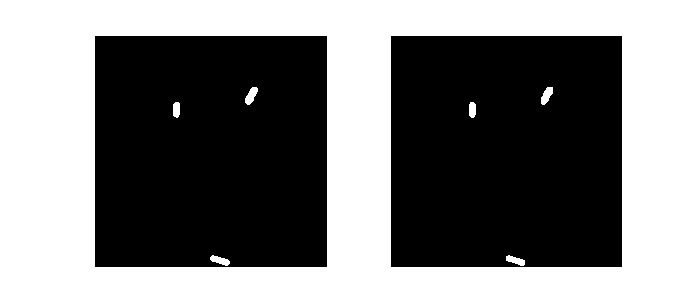

In [3]:
bin_filtered = filter_binaries(binary, min_size=350, max_size=2000, min_minor=5, max_minor=10,
                                        min_major=None, max_major=40)

fig, axes = iter_subplots(1, 2, figsize=(7, 3))
axes[0].iter_imshow(binary, cmap='gray')
axes[0].axis('off')
axes[1].iter_imshow(bin_filtered > 0, cmap='gray')
axes[1].axis('off')
fig.display()

In [10]:
data = Data()
data.add_data(bin_filtered, 'binary')
data.add_data(brightfield, 'brightfield')
data.add_data(flu, 'fluorescence')

The function ``data_to_cells`` is used to generate cell objects. By setting ``remove_multiple_cells = True`` (default), if there are other cells in the current cells' selection box, the cell is skipped. By setting ``remove_bordering = True`` (default), cells whose selection box extends over the edge of the image are skipped. To get more cell objects from the same data set, these options can be set to ``False``.

In [11]:
cells = data_to_cells(data)
len(cells)

Cell 7 on image binary 4: on the edge of the image
Cell 1 on image binary 5: on the edge of the image
Cell 6 on image binary 5: on the edge of the image
Cell 1 on image binary 11: on the edge of the image
Cell 9 on image binary 12: multiple cells per selection
Cell 11 on image binary 12: multiple cells per selection
Cell 12 on image binary 12: on the edge of the image
Cell 16 on image binary 13: on the edge of the image
Cell 2 on image binary 15: on the edge of the image
Cell 4 on image binary 15: multiple cells per selection
Cell 1 on image binary 19: multiple cells per selection
Cell 4 on image binary 19: multiple cells per selection
Cell 5 on image binary 20: on the edge of the image
Cell 10 on image binary 21: on the edge of the image
Cell 21 on image binary 21: on the edge of the image
Cell 9 on image binary 25: on the edge of the image
Cell 15 on image binary 25: multiple cells per selection
Cell 16 on image binary 25: multiple cells per selection
Cell 24 on image binary 25: on t

2519

In [15]:
save('Cy3B_NHS/cells_raw.hdf5', cells)

## eGFP

In [16]:
brightfield = tifffile.imread('eGFP/Bf_corrected.tif')
binary = tifffile.imread('eGFP/Binary.tif')
flu = tifffile.imread('eGFP/Fluorescence.tif')

<IPython.core.display.Javascript object>


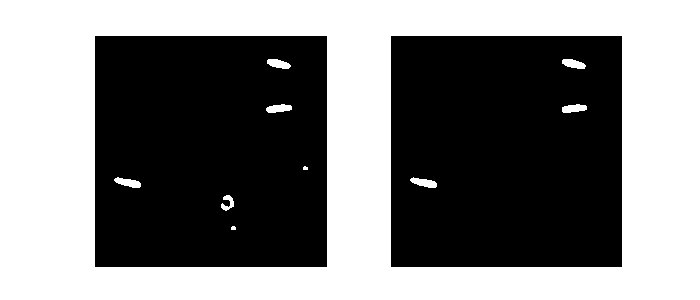

In [17]:
bin_filtered = filter_binaries(binary, min_size=350, max_size=2000, min_minor=5, max_minor=10,
                                        min_major=None, max_major=40)

fig, axes = iter_subplots(1, 2, figsize=(7, 3))
axes[0].iter_imshow(binary, cmap='gray')
axes[0].axis('off')
axes[1].iter_imshow(bin_filtered > 0, cmap='gray')
axes[1].axis('off')
fig.display()

In [18]:
data = Data()
data.add_data(bin_filtered, 'binary')
data.add_data(brightfield, 'brightfield')
data.add_data(flu, 'fluorescence')

In [19]:
cells = data_to_cells(data)
len(cells)

Cell 1 on image binary 8: multiple cells per selection
Cell 2 on image binary 8: multiple cells per selection
Cell 1 on image binary 9: on the edge of the image
Image binary 10: No cells
Cell 2 on image binary 11: multiple cells per selection
Cell 3 on image binary 11: multiple cells per selection
Image binary 15: No cells
Cell 4 on image binary 16: on the edge of the image
Cell 1 on image binary 19: on the edge of the image
Cell 2 on image binary 19: on the edge of the image
Cell 4 on image binary 19: multiple cells per selection
Cell 5 on image binary 19: on the edge of the image
Cell 1 on image binary 29: on the edge of the image
Cell 7 on image binary 29: multiple cells per selection
Cell 8 on image binary 29: multiple cells per selection
Cell 8 on image binary 31: on the edge of the image
Cell 1 on image binary 32: on the edge of the image
Cell 1 on image binary 39: on the edge of the image
Cell 2 on image binary 39: multiple cells per selection
Cell 3 on image binary 39: multiple

1741

In [20]:
save('eGFP/cells_raw.hdf5', cells)